# Import Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import io

# Utils

Helps to compute the error for that batch

In [2]:
def get_error( scores , labels ):

    bs=scores.size(0)
    predicted_labels = scores.argmax(dim=1)
    indicator = (predicted_labels == labels)
    num_matches=indicator.sum()
    
    return 1-num_matches.float()/bs 

Note: My computer has no gpu, so i will run on cpu, but the gpu code is included

In [3]:
device= torch.device("cpu")
# To run on gpu, comment the above line and uncomment the below line
#device = torch.device("cuda")

# Various Networks

Make a 2 layer net class [1 hidden layer]

In [4]:
class two_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size1, output_size):
        super(two_layer_net , self).__init__()
        
        self.layer1 = nn.Linear(  input_size   , hidden_size1  , bias=False  )
        self.layer2 = nn.Linear(  hidden_size1 , output_size  , bias=False  )
        
    def forward(self, x):
        
        y       = self.layer1(x)
        y_hat   = F.relu(y)
        scores       = self.layer2(y_hat)
        
        return scores

Make a three layer net class [2 hidden layer]

In [5]:
class three_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super(three_layer_net , self).__init__()
        
        self.layer1 = nn.Linear(  input_size   , hidden_size1  , bias=False  )
        self.layer2 = nn.Linear(  hidden_size1 , hidden_size2  , bias=False  )
        self.layer3 = nn.Linear(  hidden_size2 , output_size   , bias=False  )
        
    def forward(self, x):
        
        y       = self.layer1(x)
        y_hat   = F.relu(y)
        z       = self.layer2(y_hat)
        z_hat   = F.relu(z)
        scores  = self.layer3(z_hat)
        
        return scores

Make a multi layer net class [ideal hidden layer]

In [6]:
class multi_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6,  output_size):
        super(multi_layer_net , self).__init__()
        
        self.layer1 = nn.Linear( input_size ,  hidden_size1 , bias=False )
        self.layer2 = nn.Linear( hidden_size1 ,  hidden_size2 , bias=False )
        self.layer3 = nn.Linear( hidden_size2 ,  hidden_size3 , bias=False )
        self.layer4 = nn.Linear( hidden_size3 ,  hidden_size4 , bias=False )
        self.layer5 = nn.Linear( hidden_size4 ,  hidden_size5 , bias=False )
        self.layer6 = nn.Linear( hidden_size5 ,  hidden_size6 , bias=False )
        self.layer7 = nn.Linear( hidden_size6 ,  output_size , bias=False )
        
    def forward(self, x):
        
        x1 = self.layer1(x)
        x1_hat = F.relu(x1)
        x2 = self.layer2(x1_hat)
        x2_hat = F.relu(x2)
        x3 = self.layer3(x2_hat)
        x3_hat = F.relu(x3)
        x4 = self.layer4(x3_hat)
        x4_hat = F.relu(x4)
        x5 = self.layer5(x4_hat)
        x5_hat = F.relu(x5)
        x6 = self.layer6(x5_hat)
        x6_hat = F.relu(x6)
        scores = self.layer7(x6_hat)
        
        return scores

## Automate the various necessary information for making a multi-layer network

In [20]:
# Desired number of hidden layers
nPreAdjusted = 6
# As python range ignores the last digit
n = nPreAdjusted + 1

In [9]:
# create number for _init_
text = ''
for i in range (1,n):
    text += (f'hidden_size{i}, ')
    
print(text)

hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6, 


In [10]:
# create number of layers
for i in range (n):
    if i == 0:
        print(f'self.layer{i+1}', "=", f"nn.Linear( input_size ,  hidden_size{i+1} , bias=False )")
    elif i == n-1:
        print(f'self.layer{i+1}', "=", f"nn.Linear( hidden_size{i} ,  output_size , bias=False )")
    else: 
        print(f'self.layer{i+1}', "=", f"nn.Linear( hidden_size{i} ,  hidden_size{i+1} , bias=False )")

self.layer1 = nn.Linear( input_size ,  hidden_size1 , bias=False )
self.layer2 = nn.Linear( hidden_size1 ,  hidden_size2 , bias=False )
self.layer3 = nn.Linear( hidden_size2 ,  hidden_size3 , bias=False )
self.layer4 = nn.Linear( hidden_size3 ,  hidden_size4 , bias=False )
self.layer5 = nn.Linear( hidden_size4 ,  hidden_size5 , bias=False )
self.layer6 = nn.Linear( hidden_size5 ,  hidden_size6 , bias=False )
self.layer7 = nn.Linear( hidden_size6 ,  output_size , bias=False )


In [8]:
# create number for forward
for i in range (n):
    if i == 0:
        print(f'x{i+1}', "=", f"self.layer{i+1}(x)")
        print(f'x{i+1}_hat', "=", f"F.relu(x{i+1})")
    elif i == n-1:
        print('scores', "=", f"self.layer{i+1}(x{i}_hat)")
    else: 
        print(f'x{i+1}', "=", f"self.layer{i+1}(x{i}_hat)")
        print(f'x{i+1}_hat', "=", f"F.relu(x{i+1})")

x1 = self.layer1(x)
x1_hat = F.relu(x1)
x2 = self.layer2(x1_hat)
x2_hat = F.relu(x2)
x3 = self.layer3(x2_hat)
x3_hat = F.relu(x3)
x4 = self.layer4(x3_hat)
x4_hat = F.relu(x4)
x5 = self.layer5(x4_hat)
x5_hat = F.relu(x5)
x6 = self.layer6(x5_hat)
x6_hat = F.relu(x6)
scores = self.layer7(x6_hat)


Output the net

In [11]:
# create number of inputs
text = 'net = multi_layer_net(48,'
for i in range (1,n):
    text += ('72, ')
    
text += ('10)')

print(text)

net = multi_layer_net(48,72, 72, 72, 72, 72, 72, 10)


Build the net (After pasting the new output below here)

In [21]:
#net=two_layer_net(48,2,10)
#net=three_layer_net(48, 2, 2, 10)
net = multi_layer_net(48,72, 72, 72, 72, 72, 72, 10)
net = net.to(device)

Choose the criterion and batch size

In [13]:
criterion = nn.CrossEntropyLoss()

lr = 0.02

optimizer=torch.optim.SGD( net.parameters() , lr=lr )

bs=53

# Network Evaluation

Evaluate on test set which will be 30% of the total 2952 data set

In [14]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    testSetSize = 2952 - 2067
    bs = 59
    for i in range(0,testSetSize,bs):

        # extract the minibatch
        minibatch_data = test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]
        
        # send them to the cpu/gpu (ideally gpu but my computer do not have gpu)
        minibatch_data=minibatch_data.to(device)
        minibatch_label=minibatch_label.to(device)

        # reshape the minibatch
        inputs = minibatch_data.view(bs,48)

        # feed it to the network
        scores=net( inputs ) 

        # compute the error made on this batch
        error = get_error( scores , minibatch_label)

        # add it to the running error
        running_error += error.item()

        num_batches+=1


    # compute error rate on the full test set
    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

Display the probability of the monitoring case result from the training process on the test set

In [15]:
def show_prob_monitoringCase(p, actual):

    p=p.data.squeeze().numpy()
    # only first 3 data necessary
    p = p[:3]

    # find out what the mlp has predicted as the most probable outcome
    temp = []
    for i in range(len(p)):
        tempInt = float('{0:2f}'.format(p[i]))
        temp.append(tempInt) 
        if i == 0:
            predict = 0
        elif i == 1:
            if temp[1]>temp[0]:
                predict = 1
        elif i == 2:
            if temp[predict]<temp[2]:
                predict = 2

    # display warning colour (red) when predicted result is not the actual result
    # display normal colour (blue) when predicted result matches actual result
    if actual != predict:
        col = 'red'
    else:
        col = 'blue'
    
    ft=15
    label = ('Normal', 'Weaving', 'Short Forming')
    y_pos = np.arange(len(p))*1.2
    target=2
    width=0.9

    plt.rcdefaults()
    fig, ax = plt.subplots()

    # the plot
    ax.barh(y_pos, p, width , align='center', color=col)

    ax.set_xlim([0, 1.3])

    # y label
    ax.set_yticks(y_pos)
    ax.set_yticklabels(label, fontsize=ft)
    ax.invert_yaxis()  

    # x label
    ax.set_xticklabels([])
    ax.set_xticks([])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_linewidth(4)


                
    # display the result in bar at their designated spot
    for i in range(len(p)):
        str_nb="{0:.2f}".format(p[i])
        ax.text( p[i] + 0.05 , y_pos[i] ,str_nb ,
                 horizontalalignment='left', verticalalignment='center',
                 transform=ax.transData, color= col,fontsize=ft)



    plt.show()

# Data Handling

In [17]:
# load data
data1             = scipy.io.loadmat(r'OQC.mat')
data              = data1.get('data')
data              = torch.from_numpy(data)
data              = data.float()

#Train data set to 70% of total, 2952 * .7 round up
train_data         = data[:2067,0:-1]
train_label        = data[:2067,-1]
train_label        = train_label.long()

#Test data set to 30% of total, 2952 * .3
test_data         = data[2067:,0:-1]
test_label        = data[2067:,-1]
test_label        = test_label.long()

batchSize         = 50
nData             = train_data.shape[0]
nBatch            = int(nData/batchSize)
nInputSensor      = test_data.shape[1]

# Train and Test

Train the network on the train set (process 70% of the total data, i.e. 2952 x .7 round up)

In [16]:
def monitoringTraining():
    start = time.time()


    for epoch in range(200):


        running_loss=0
        running_error=0
        num_batches=0

        
        shuffled_indices=torch.randperm(2067)

        for count in range(0,2067,bs):

            # forward and backward pass

            # Set the gradients to zeros
            optimizer.zero_grad()

            # create a minibatch  
            indices=shuffled_indices[count:count+bs]
            minibatch_data =  train_data[indices]
            minibatch_label= train_label[indices]
            
            # send them to the cpu/gpu (in this case, im on cpu as i do not have gpu)
            minibatch_data=minibatch_data.to(device)
            minibatch_label=minibatch_label.to(device)

            # reshape the minibatch
            inputs = minibatch_data.view(bs,48)

            # tell Pytorch to start tracking all operations that will be done on "inputs"
            inputs.requires_grad_()

            # forward the minibatch through the net
            scores=net( inputs ) 

            # Compute the average of the losses of the data points in the minibatch
            loss =  criterion( scores , minibatch_label) 

            # backward pass to compute dL/dU, dL/dV and dL/dW  
            loss.backward()

            # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
            optimizer.step()


            # compute some stats

            running_loss += loss.detach().item()

            error = get_error( scores.detach() , minibatch_label)
            running_error += error.item()

            num_batches+=1


        # once the epoch is finished we divide the "running quantities"
        # by the number of batches

        total_loss = running_loss/num_batches
        total_error = running_error/num_batches
        elapsed_time = time.time() - start

        # only at 190 epoch we display the stats 
        # and compute the error rate on the test set  

        if epoch % 190 == 0 : 

            print(' ')

            print('epoch=',epoch, ' time=', elapsed_time,
                  ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)

            eval_on_test_set()

# Main Training

In [18]:
monitoringTraining()

 
epoch= 0  time= 0.0523676872253418  loss= 2.301977255405524  error= 99.4194487730662 percent lr= 0.02
test error  =  99.88700548807779 percent
 
epoch= 190  time= 10.36646580696106  loss= 0.0005564709579816852  error= 0.0 percent lr= 0.02
test error  =  28.36158275604248 percent


# Applying onto Various Samples

Actual case is Normal Case


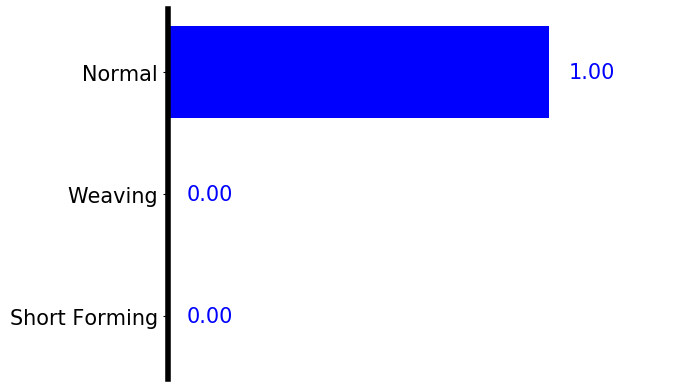

Actual case is Weaving Case


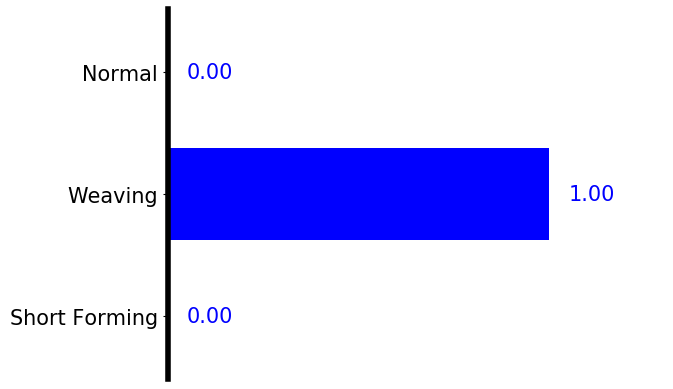

Actual case is Short Forming Case


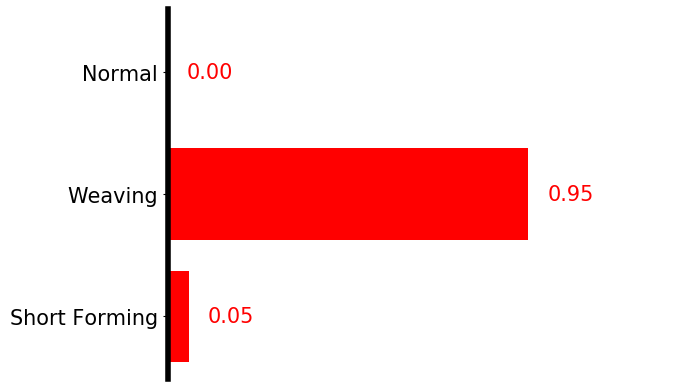

Actual case is Weaving Case


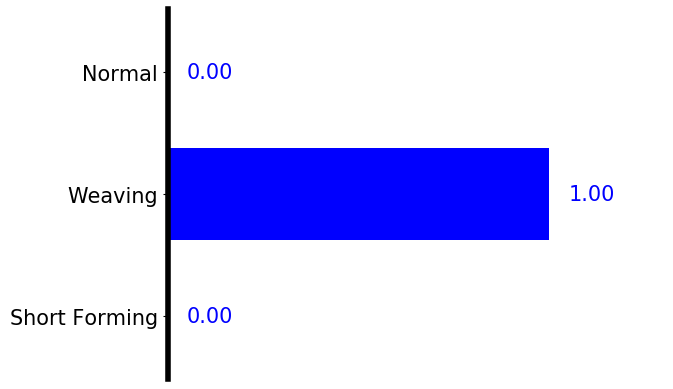

Actual case is Short Forming Case


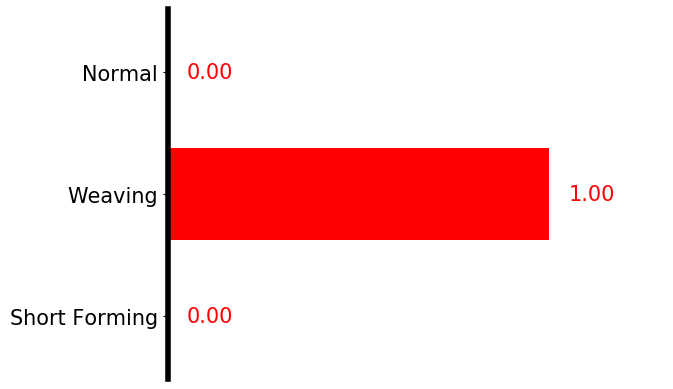

Actual case is Weaving Case


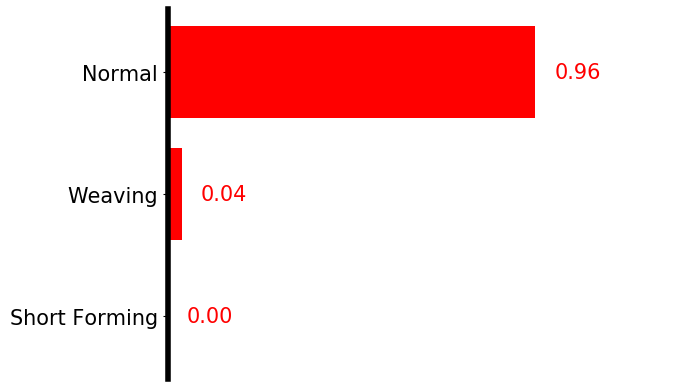

Actual case is Short Forming Case


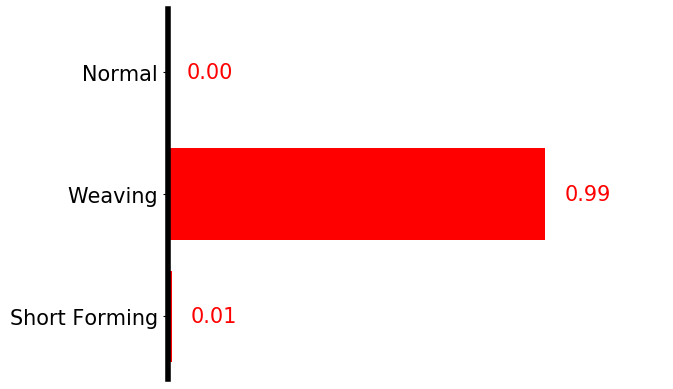

Actual case is Weaving Case


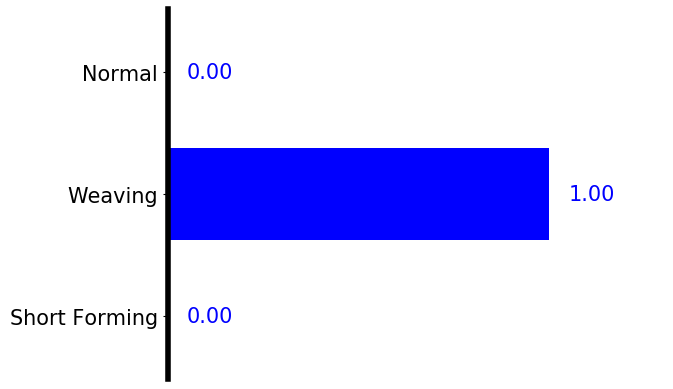

Actual case is Short Forming Case


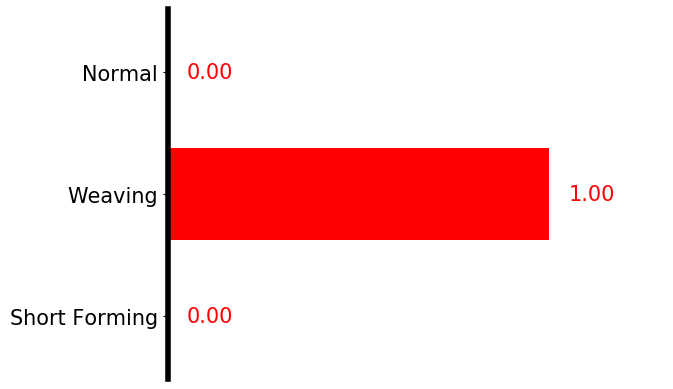

Actual case is Weaving Case


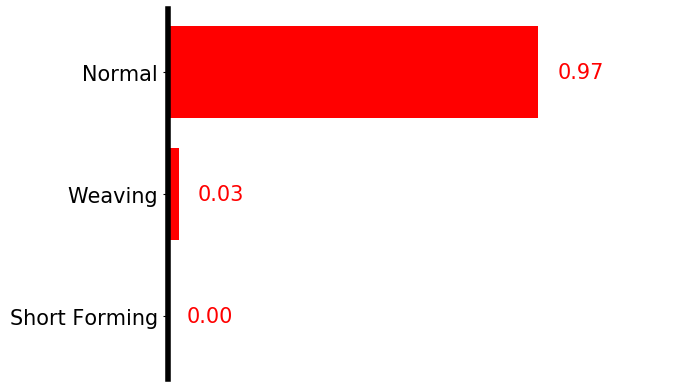

Actual case is Normal Case


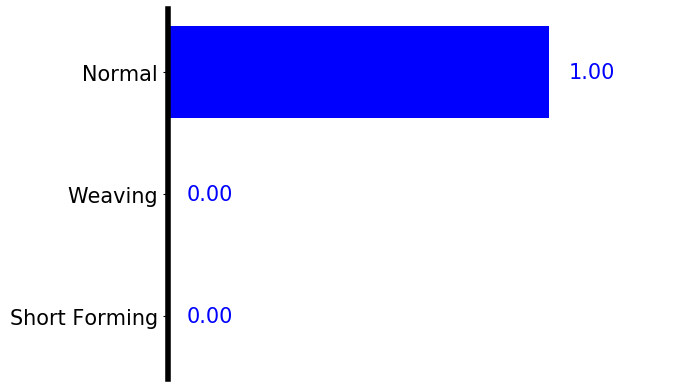

Actual case is Short Forming Case


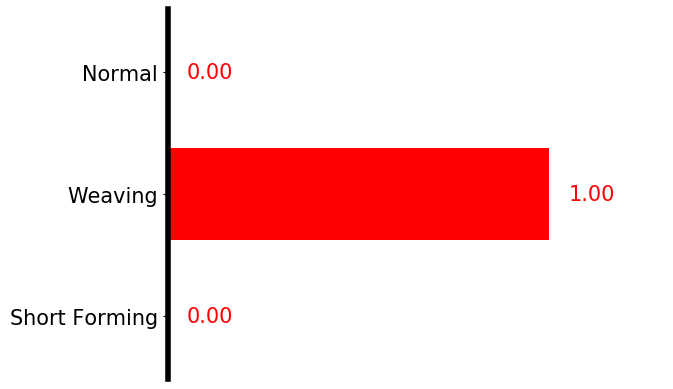

Actual case is Short Forming Case


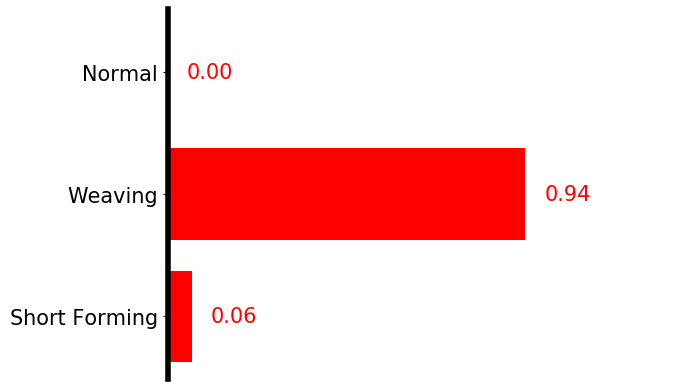

Actual case is Short Forming Case


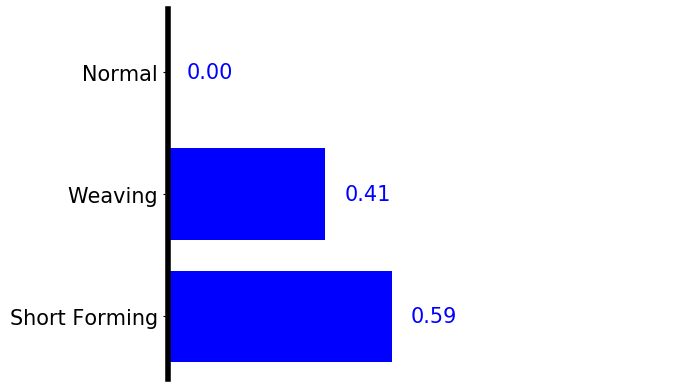

Actual case is Short Forming Case


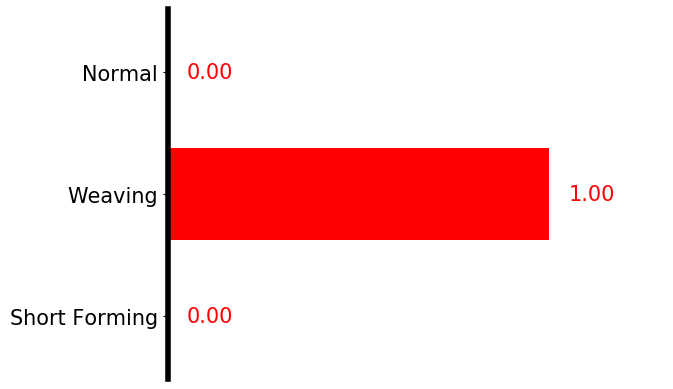

Actual case is Short Forming Case


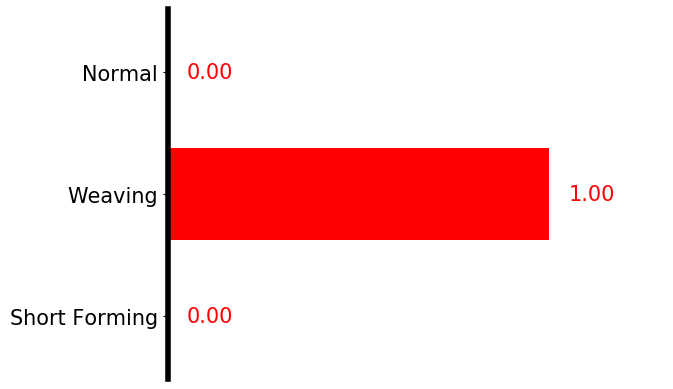

Actual case is Normal Case


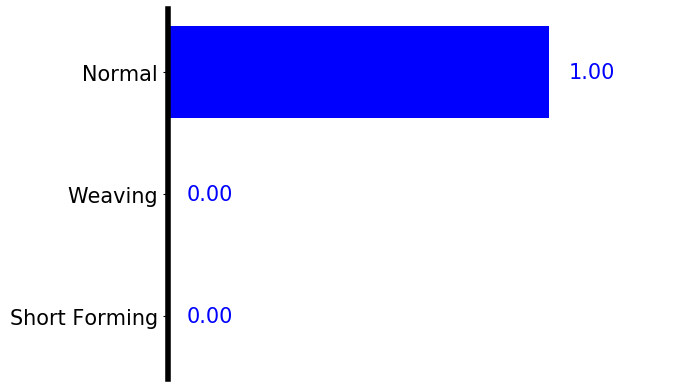

Actual case is Weaving Case


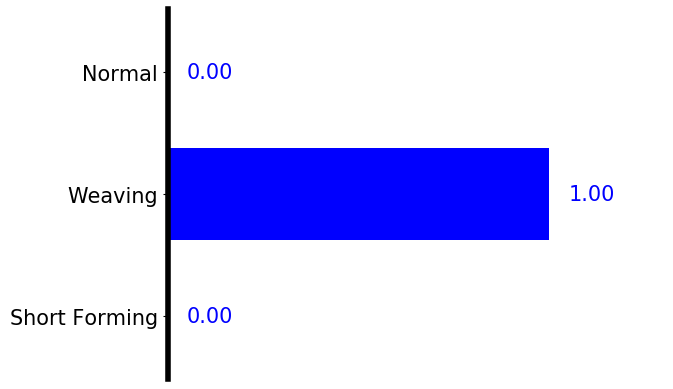

Actual case is Weaving Case


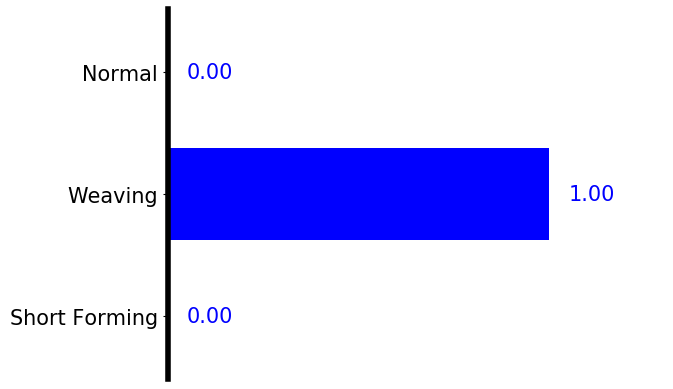

Actual case is Weaving Case


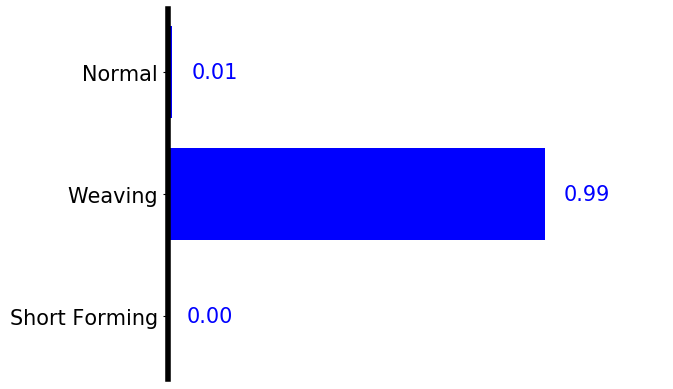

In [19]:
# Run the test as many times as the defined range for visualization of data
for i in range(20):
    # choose a picture at random from the test set that is 30% of the total
    idx=randint(0, 885-1)
    im=test_data[idx]
    actual = test_label[idx]
    if actual == 0:
        print("Actual case is Normal Case")
    elif actual == 1:
        print("Actual case is Weaving Case")
    elif actual == 2:
        print("Actual case is Short Forming Case")

    # feed it to the net and display the confidence scores
    scores =  net( im.view(1,48)) 
    probs= F.softmax(scores, dim=1)
    show_prob_monitoringCase(probs, actual)